In [1]:
import csv
import os
import pandas as pd
import numpy as np
import pyregion
import matplotlib.pyplot as plt
import matplotlib as mpl
import time

from astropy.io import fits
from matplotlib import path
from scipy.stats import gaussian_kde
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

%matplotlib inline

In [2]:
#prefix of files
prefix='CENA-132302'

#read in photometry (cuts are made in both_phot)
real_file = "%s.phot2" % prefix #IF PHOT INSTEAD OF PHOT2, REACTIVATE LINE 31
real_df = pd.read_csv(real_file, delim_whitespace=True, header=0) #create data frame 
real_df = real_df.iloc[:,:37] #select till relevant end of data frame (quality flag of I)

#define V-I (not Vega)
real_df['V-I'] = real_df['mag_V'] - real_df['mag_I']

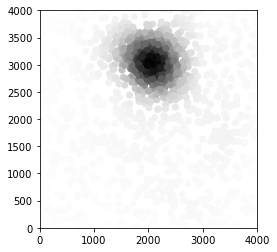

In [3]:
# make density plot
fig = plt.figure()
ax1 = fig.add_subplot(111)

a = real_df['x']
b = real_df['y']
color = real_df['V-I']

ab = np.vstack([a,b])
c = gaussian_kde(ab)(ab)

ax1.scatter(a, b, c=c, s=50, edgecolor='', cmap='Greys')
ax1.plot()
ax1.set_xlim([0, 4000])
ax1.set_ylim([0, 4000])
#dax1.set_aspect('equal')

In [4]:
#define function to insert the above density plot into a numpy array

fillUp = np.zeros((4000,4000))

def filler():
    start = time.time()
    for i in range(len(a)):
        aa, bb = int(b[i]), int(a[i])
        n = 4000
        r = 40
        y,x = np.ogrid[-aa:n-aa, -bb:n-bb]
        mask = x*x + y*y <= r*r
        fillUp[mask] = fillUp[mask] + (color[i] * 10)
#         print(i)
    end = time.time()
    print(end - start)

In [5]:
#run the above function and time it
filler()

135.49334692955017


/Users/Deep/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/Users/Deep/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


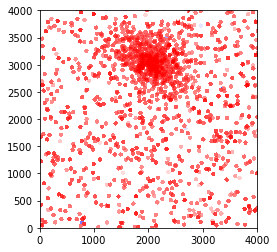

In [6]:
#show it
plt.imshow(np.log10(fillUp), origin='lower', vmin=-2, vmax=2, cmap='bwr')

In [7]:
#export to a FITS file
hdu = fits.PrimaryHDU(fillUp)
hdu.writeto('region%s.fits' %prefix)